In [1]:
import pandas_datareader as web 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def LoadStockData(tickers,start=datetime(2014,1,1),end=datetime(2018,12,31)):
    if not os.path.exists('stockdata'):
        os.makedirs('stockdata')
    data = pd.DataFrame()
    for i in range(len(tickers)):
        df = web.DataReader(tickers[i],"yahoo",start=start,end=end)
        close = df['Close']
        data[tickers[i]] = close
        df.to_csv('stockdata/{}'.format(tickers[i]))
    data.to_csv('stockdata/{}'.format(tickers))
    return data
tickers = ['MSFT','CNP', 'QQQ', 'WMT', 'GE', 'TSLA','AAPL','GOOG','AMZN']
data=LoadStockData(tickers)

In [2]:
def PortfolioEfficientFrontier(data,tickers,num_weights=5000):
    port_ret = []
    port_std = []
    port_weight = []

    LogRet = np.log(data/data.shift(1)).dropna()
    cov = LogRet.cov()
    r = LogRet.mean()

    num_tickers = len(tickers)
    for _ in range(num_weights):
        weight = np.random.random(num_tickers)
        weight /= np.sum(weight)
        port_weight.append(weight)
        port_ret.append(np.dot(weight,r)*252)
        port_std.append(np.sqrt(np.dot(weight.T,np.dot(cov,weight))*252))

    df = {'Return':port_ret,'Volatility':port_std}
    for i in range(len(tickers)):
        df[tickers[i]+'weight'] = (np.array(port_weight).T)[i]
    df = pd.DataFrame(df)
    return df
df = PortfolioEfficientFrontier(data,tickers)

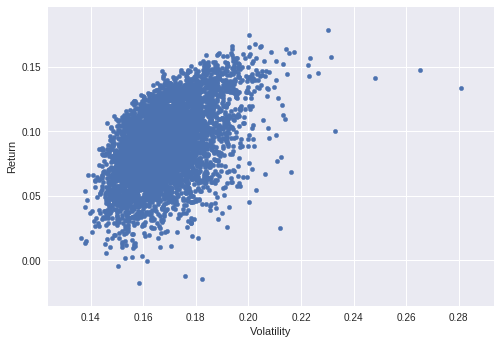

In [3]:
plt.style.use('seaborn')
df.plot(x='Volatility',y='Return',kind= 'scatter');